# Crossover Plots

Code from Zac Bush, displays SNPs and crossover locations

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

### Crossovers

Read the frame that has crossover locations

In [3]:
bsp_COs = pd.read_pickle('bsp_COs_final_set.pickle.gzip', compression='gzip')

In [4]:
bsp_COs.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts,upstream_CB4856_purity,downstream_CB4856_purity,...,10.0Mb_downstream_geno_purity,10.0Mb_upstream_state_purity,10.0Mb_downstream_state_purity,10.0Mb_geno_purity_diff,10.0Mb_state_purity_diff,10.0Mb_state_cumulative_diff,is_CO,CO_probability,germ_cell,is_double_CO
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2,0.958271,0.000000,...,0.009974,0.963222,0.000000,0.339458,0.963222,0.897315,1,0.996,oocyte,0
175,BSP-OR-001,5,2122282,2122633,transition,BSP-OR-001-5,351,2,0.000000,0.828465,...,0.250558,0.000000,0.882883,0.248949,0.882883,0.729747,1,0.666,oocyte,0
791,BSP-OR-002,1,14819177,14819806,transition,BSP-OR-002-1,629,2,0.931145,0.000000,...,0.011019,0.978697,0.000000,0.294939,0.978697,0.567969,1,0.866,oocyte,0
794,BSP-OR-002,2,2587074,2587324,transition,BSP-OR-002-2,250,2,0.000000,0.816375,...,0.135594,0.000000,0.787037,0.132548,0.787037,0.811592,1,0.876,oocyte,0
1594,BSP-OR-003,1,12185988,12186112,transition,BSP-OR-003-1,124,2,0.000000,0.993129,...,0.396770,0.000000,0.993763,0.357180,0.993763,0.996652,1,1.000,oocyte,0


In [5]:
len(bsp_COs)

1575

### SNPS

In [6]:
bsp_SNPs = pd.read_pickle('BSP_TIGER.marker_dataframe.pickle.gzip', compression='gzip')

In [7]:
len(bsp_SNPs)

130290510

In [8]:
len(bsp_SNPs.columns)

11

In [9]:
bsp_SNPs.head(5)

,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id
0,BSP-OR-202,1,855,unknown,N2,N2,G,0,C,0,BSP-OR-202-1
1,BSP-OR-202,1,1222,unknown,N2,N2,A,0,C,0,BSP-OR-202-1
2,BSP-OR-202,1,1933,unknown,N2,N2,C,0,G,0,BSP-OR-202-1
3,BSP-OR-202,1,3048,uN2,N2,N2,C,3,G,0,BSP-OR-202-1
4,BSP-OR-202,1,3659,N2,N2,N2,C,7,T,2,BSP-OR-202-1


### Plot Function

In [10]:
tiger_marker_df = bsp_SNPs

In [11]:
def plot_single_chromosomes(chrom_id = str, plot_strip = True, strip_col=str, plot_data = True, data_cols = []):

    bases_df = tiger_marker_df[tiger_marker_df['chrom_id']==chrom_id]
    intervals_df = bsp_COs[bsp_COs['chrom_id']==chrom_id]

    palette = {'CB4856':'mediumblue', 'N2':'crimson', "het":"darkblue", "uN2":'red', "uCB4856":'mediumblue', 'unknown':"grey"}

    COs = list(intervals_df[intervals_df['is_CO']==1].start)

    print(chrom_id, COs)

    ##### plot HMM states as strip plots #####

    if plot_strip == True:
        sns.set_theme(rc={'figure.figsize':(130, 20)}, style="ticks", font_scale=5)

        sns.stripplot(data=bases_df, x="position", jitter=.3, size=20,  hue=strip_col, palette = palette)

        if len(COs) != 0:
            for co in COs:
                 plt.axvline(co, color='green', lw=7)

        plt.show()
        sns.reset_orig()


    ##### plot other data as lines #####
    if plot_data == True:
        for column in data_cols:
            print(chrom_id)
            sns.lineplot(data=intervals_df, x='stop', y=column)
            plt.show()

Zac's example:

BSP-OR-001-4 [15669138]


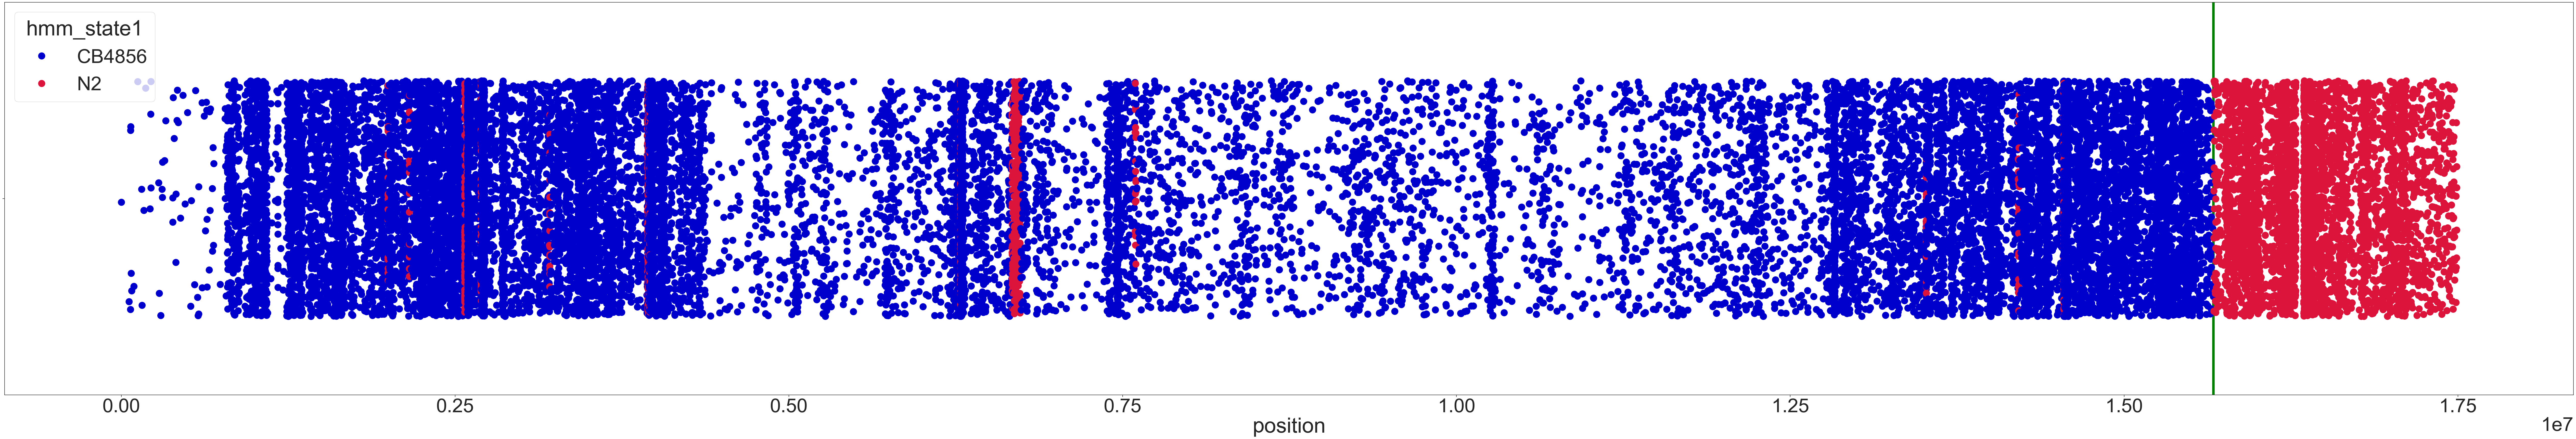

In [14]:
plot_single_chromosomes(chrom_id = 'BSP-OR-001-4', plot_strip = True, strip_col='hmm_state1', plot_data = True, data_cols = [])

### Intervals

Another data file from Zac

In [4]:
intervals = pd.read_pickle('BSP_TIGER.intervals_dataframe.pickle.gzip', compression='gzip')

In [5]:
intervals.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
100999,BSP-OR-202,1,1,2820551,N2,BSP-OR-202-1,2820551,7310
101000,BSP-OR-202,1,2820551,2820595,transition,BSP-OR-202-1,44,2
101001,BSP-OR-202,1,2820595,2821506,CB4856,BSP-OR-202-1,912,27
101002,BSP-OR-202,1,2821506,2821610,transition,BSP-OR-202-1,104,2
101003,BSP-OR-202,1,2821610,8506388,N2,BSP-OR-202-1,5684779,4643


In [6]:
len(intervals)

326744

In [14]:
intervals[intervals.chrom_id == 'BSP-OR-001-4'].head(50)

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
111,BSP-OR-001,4,1,1996956,CB4856,BSP-OR-001-4,1996956,2719
112,BSP-OR-001,4,1996956,1997145,transition,BSP-OR-001-4,189,2
113,BSP-OR-001,4,1997145,1997566,N2,BSP-OR-001-4,422,19
114,BSP-OR-001,4,1997566,1997578,transition,BSP-OR-001-4,12,2
115,BSP-OR-001,4,1997578,2156628,CB4856,BSP-OR-001-4,159051,348
116,BSP-OR-001,4,2156628,2157039,transition,BSP-OR-001-4,411,2
117,BSP-OR-001,4,2157039,2157113,N2,BSP-OR-001-4,75,13
118,BSP-OR-001,4,2157113,2157459,transition,BSP-OR-001-4,346,2
119,BSP-OR-001,4,2157459,2571243,CB4856,BSP-OR-001-4,413785,1364
120,BSP-OR-001,4,2571243,2571293,transition,BSP-OR-001-4,50,2
